# Table of Contents
 <p><div class="lev2 toc-item"><a href="#Reading-in-dataset" data-toc-modified-id="Reading-in-dataset-01"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Reading in dataset</a></div><div class="lev3 toc-item"><a href="#Basic-data-cleaning" data-toc-modified-id="Basic-data-cleaning-011"><span class="toc-item-num">0.1.1&nbsp;&nbsp;</span>Basic data cleaning</a></div><div class="lev3 toc-item"><a href="#Data-distribution-and-summary" data-toc-modified-id="Data-distribution-and-summary-012"><span class="toc-item-num">0.1.2&nbsp;&nbsp;</span>Data distribution and summary</a></div><div class="lev3 toc-item"><a href="#Modeling-and-preprocessing(feature-transformation)-for-ML" data-toc-modified-id="Modeling-and-preprocessing(feature-transformation)-for-ML-013"><span class="toc-item-num">0.1.3&nbsp;&nbsp;</span>Modeling and preprocessing(feature transformation) for ML</a></div><div class="lev4 toc-item"><a href="#Logit-model" data-toc-modified-id="Logit-model-0131"><span class="toc-item-num">0.1.3.1&nbsp;&nbsp;</span>Logit model</a></div><div class="lev4 toc-item"><a href="#SVM-model" data-toc-modified-id="SVM-model-0132"><span class="toc-item-num">0.1.3.2&nbsp;&nbsp;</span>SVM model</a></div><div class="lev3 toc-item"><a href="#Feature-selection-(-quick-test)" data-toc-modified-id="Feature-selection-(-quick-test)-014"><span class="toc-item-num">0.1.4&nbsp;&nbsp;</span>Feature selection ( quick test)</a></div><div class="lev3 toc-item"><a href="#Further-&amp;-next-steps---improving-model-performance" data-toc-modified-id="Further-&amp;-next-steps---improving-model-performance-015"><span class="toc-item-num">0.1.5&nbsp;&nbsp;</span>Further &amp; next steps - improving model performance</a></div>


    The challenge of this competition is to predict if the car purchased at the Auction is a good / bad buy.
    All the variables in the data set are defined in the file Carvana_Data_Dictionary.txt 
    The data contains missing values 
    The dependent variable (IsBadBuy) is binary (C2)
    There are 32 Independent variables (C3-C34)
    The data set is split to 60% training and 40% testing.

( time taken ~ 2.15 hours )

In [191]:
!ls

Carvana_Data_Dictionary.txt test.csv
carvana_kaggle.ipynb        training.csv


In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')

## Reading in dataset

In [54]:
train_df = pd.read_csv('training.csv', parse_dates=True)
test_df=pd.read_csv('test.csv', parse_dates=True)
train_df['PurchDate']  = pd.to_datetime(train_df['PurchDate'])
train_df.head()

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,2009-12-07,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,...,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,2009-12-07,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,...,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0,2009-12-07,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,...,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,0,2009-12-07,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,...,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,0,2009-12-07,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,...,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020


In [55]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 34 columns):
RefId                                72983 non-null int64
IsBadBuy                             72983 non-null int64
PurchDate                            72983 non-null datetime64[ns]
Auction                              72983 non-null object
VehYear                              72983 non-null int64
VehicleAge                           72983 non-null int64
Make                                 72983 non-null object
Model                                72983 non-null object
Trim                                 70623 non-null object
SubModel                             72975 non-null object
Color                                72975 non-null object
Transmission                         72974 non-null object
WheelTypeID                          69814 non-null float64
WheelType                            69809 non-null object
VehOdo                               72983 non-null int64
Na

----

### Basic data cleaning

- encode categorical variables(including some log-likelihoods)
- remove features with less importance
- Impute and replace null + missing values
- normalize continuous variables

In [50]:
train_df.head()

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,2009-12-07,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,...,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,2009-12-07,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,...,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0,2009-12-07,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,...,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,0,2009-12-07,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,...,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,0,2009-12-07,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,...,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020


Top 10 makes in the dataset

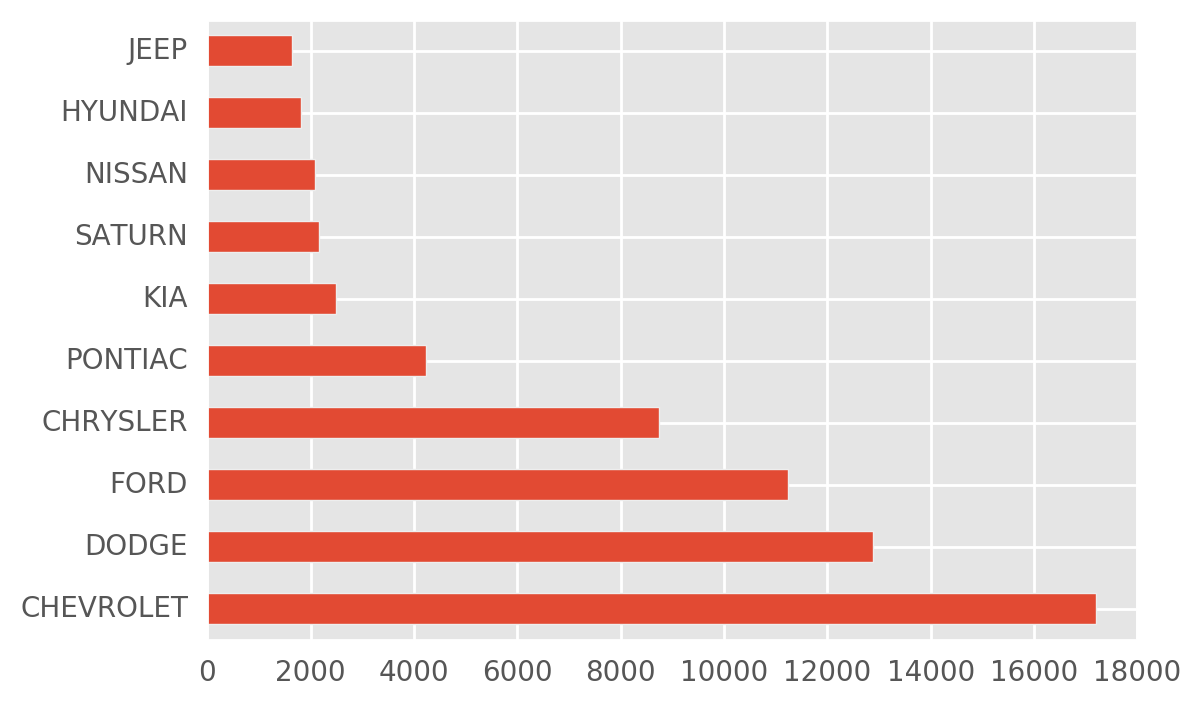

In [131]:
train_df.Make.value_counts()[:10].plot(kind='barh')

Split into categorical and continuous columns

In [132]:
categoricalCols = ['Auction','VehYear','Make','Color','Transmission','WheelType',\
                        'Nationality','Size','TopThreeAmericanName','VNST']

## will be replaced by Log-likelihood
categoricalCols1 = ['Model','Trim','SubModel']

## Continous values will be normalized
continousCols=['VehOdo','MMRAcquisitionAuctionAveragePrice',\
      'MMRAcquisitionAuctionCleanPrice','MMRAcquisitionRetailAveragePrice',\
      'MMRAcquisitonRetailCleanPrice','MMRCurrentAuctionAveragePrice','MMRCurrentAuctionCleanPrice', \
      'MMRCurrentRetailAveragePrice','MMRCurrentRetailCleanPrice','WarrantyCost']

## Features to remove
featureRemove = ['RefId','Model', 'Trim','SubModel','WheelTypeID','PurchDate','PRIMEUNIT',\
                         'AUCGUART','VNZIP1','BYRNO']

In [56]:
#drop not so important features by "intuition"
train_df.drop(featureRemove, axis=1, inplace=True)

How many null values in each column? And let's remove null vals

In [57]:
train_df.isnull().sum()

IsBadBuy                                0
Auction                                 0
VehYear                                 0
VehicleAge                              0
Make                                    0
Color                                   8
Transmission                            9
WheelType                            3174
VehOdo                                  0
Nationality                             5
Size                                    5
TopThreeAmericanName                    5
MMRAcquisitionAuctionAveragePrice      18
MMRAcquisitionAuctionCleanPrice        18
MMRAcquisitionRetailAveragePrice       18
MMRAcquisitonRetailCleanPrice          18
MMRCurrentAuctionAveragePrice         315
MMRCurrentAuctionCleanPrice           315
MMRCurrentRetailAveragePrice          315
MMRCurrentRetailCleanPrice            315
VNST                                    0
VehBCost                                0
IsOnlineSale                            0
WarrantyCost                      

In [75]:
#replace strings
train_df['Transmission'].replace("Manual", "MANUAL", inplace=True)

#drop NaN's from df
train_df.dropna(subset=["Color", "MMRAcquisitionAuctionAveragePrice", "MMRCurrentAuctionAveragePrice", \
                       "Size", "MMRCurrentAuctionCleanPrice", "MMRCurrentRetailAveragePrice", "MMRCurrentRetailCleanPrice"], inplace=True)


### Data distribution and summary

In [34]:
train_df.describe()

,RefId,IsBadBuy,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
count,72983.000000,72983.000000,72983.000000,72983.000000,69814.000000,72983.000000,72965.000000,72965.000000,72965.000000,72965.000000,72668.000000,72668.000000,72668.000000,72668.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000
mean,36511.428497,0.122988,2005.343052,4.176644,1.494299,71499.995917,6128.909217,7373.636031,8497.034332,9850.928240,6132.081287,7390.681827,8775.723331,10145.385314,26345.842155,58043.059945,6730.934326,0.025280,1276.580985
std,21077.241302,0.328425,1.731252,1.712210,0.521290,14578.913128,2461.992768,2722.491986,3156.285284,3385.789541,2434.567723,2686.248852,3090.702941,3310.254351,25717.351219,26151.640415,1767.846435,0.156975,598.846788
min,1.000000,0.000000,2001.000000,0.000000,0.000000,4825.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,835.000000,2764.000000,1.000000,0.000000,462.000000
25%,18257.500000,0.000000,2004.000000,3.000000,1.000000,61837.000000,4273.000000,5406.000000,6280.000000,7493.000000,4275.000000,5414.000000,6536.000000,7784.000000,17212.000000,32124.000000,5435.000000,0.000000,837.000000
50%,36514.000000,0.000000,2005.000000,4.000000,1.000000,73361.000000,6097.000000,7303.000000,8444.000000,9789.000000,6062.000000,7313.000000,8729.000000,10103.000000,19662.000000,73108.000000,6700.000000,0.000000,1155.000000
75%,54764.500000,0.000000,2007.000000,5.000000,2.000000,82436.000000,7765.000000,9021.000000,10651.000000,12088.000000,7736.000000,9013.000000,10911.000000,12309.000000,22808.000000,80022.000000,7900.000000,0.000000,1623.000000
max,73014.000000,1.000000,2010.000000,9.000000,3.000000,115717.000000,35722.000000,36859.000000,39080.000000,41482.000000,35722.000000,36859.000000,39080.000000,41062.000000,99761.000000,99224.000000,45469.000000,1.000000,7498.000000


This shows a skewed dataset with '1' appearing only 1/7 times. Will come back to this later

In [14]:
train_df['IsBadBuy'].value_counts()

0    64007
1     8976
Name: IsBadBuy, dtype: int64

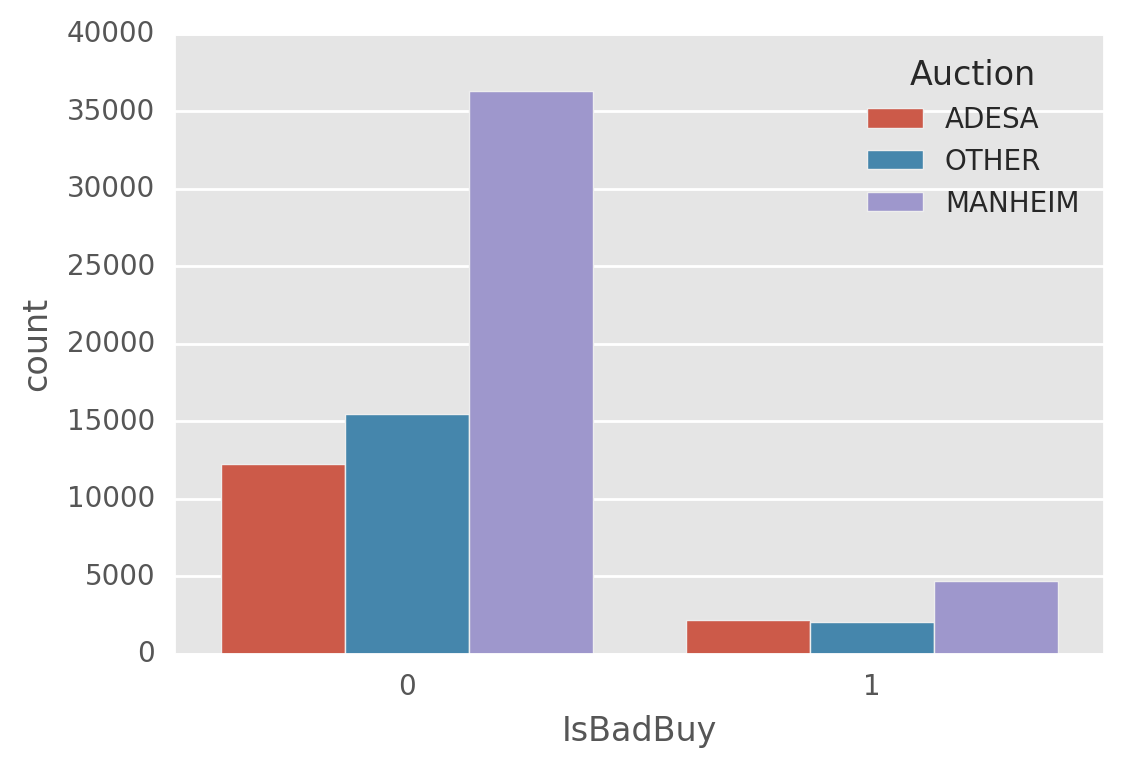

In [33]:
ax = sns.countplot(x="IsBadBuy", hue="Auction", data=train_df)

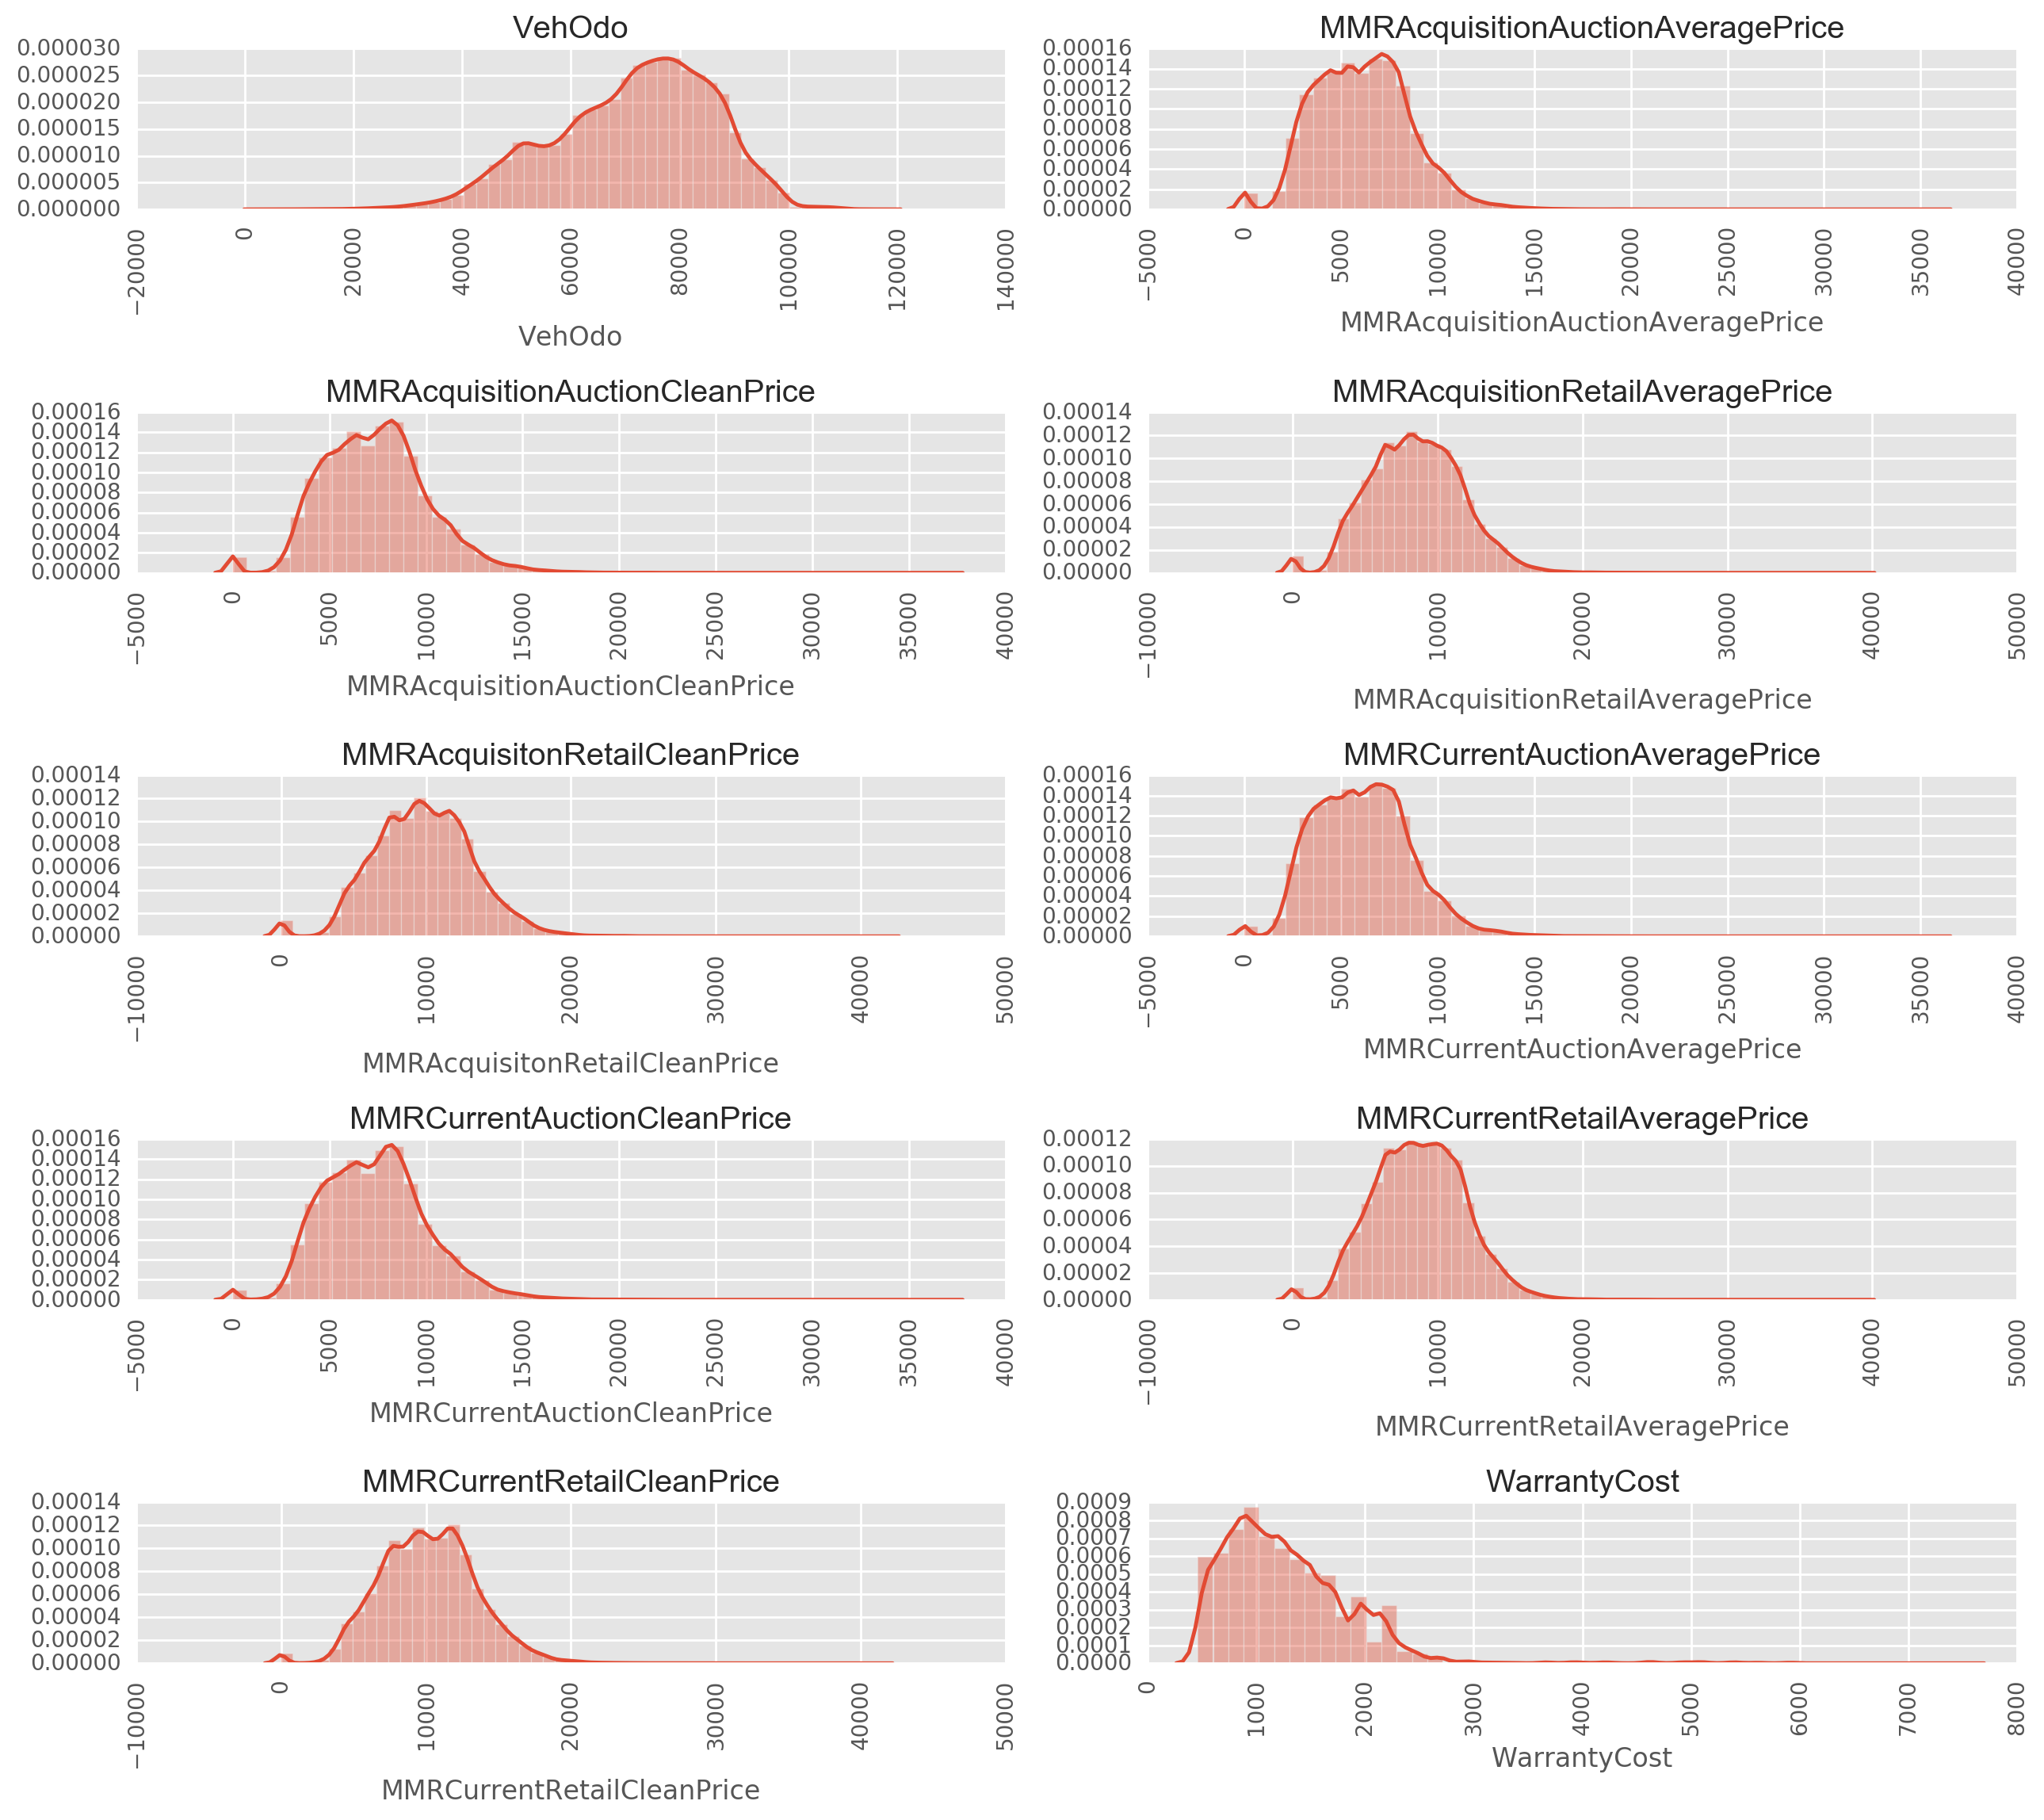

In [80]:
# Plot all continuous variables
cont_features = list(train_df[continousCols])
plt.figure(figsize=(13, 13))

for i in range(len(cont_features)):
    plt.subplot(6, 2, i+1)
    sns.distplot(train_df[cont_features[i]])
    plt.title(cont_features[i])
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Let's drop and replace MMR* prices with a grouped average price

In [83]:
X = train_df.copy()
Y = train_df["IsBadBuy"].copy()
''' 
take avg price of ['MMRAcquisitionAuctionAveragePrice','MMRAcquisitionAuctionCleanPrice',
 'MMRAcquisitionRetailAveragePrice',
 'MMRAcquisitonRetailCleanPrice',
 'MMRCurrentAuctionAveragePrice',
 'MMRCurrentAuctionCleanPrice',
 'MMRCurrentRetailAveragePrice',
 'MMRCurrentRetailCleanPrice']
'''
X["AvgAuctionPrice"] = sum(train_df[i] for i in continousCols[1:-1])/len(continousCols[1:-1])
X.drop(continousCols[1:-1], axis=1, inplace=True)

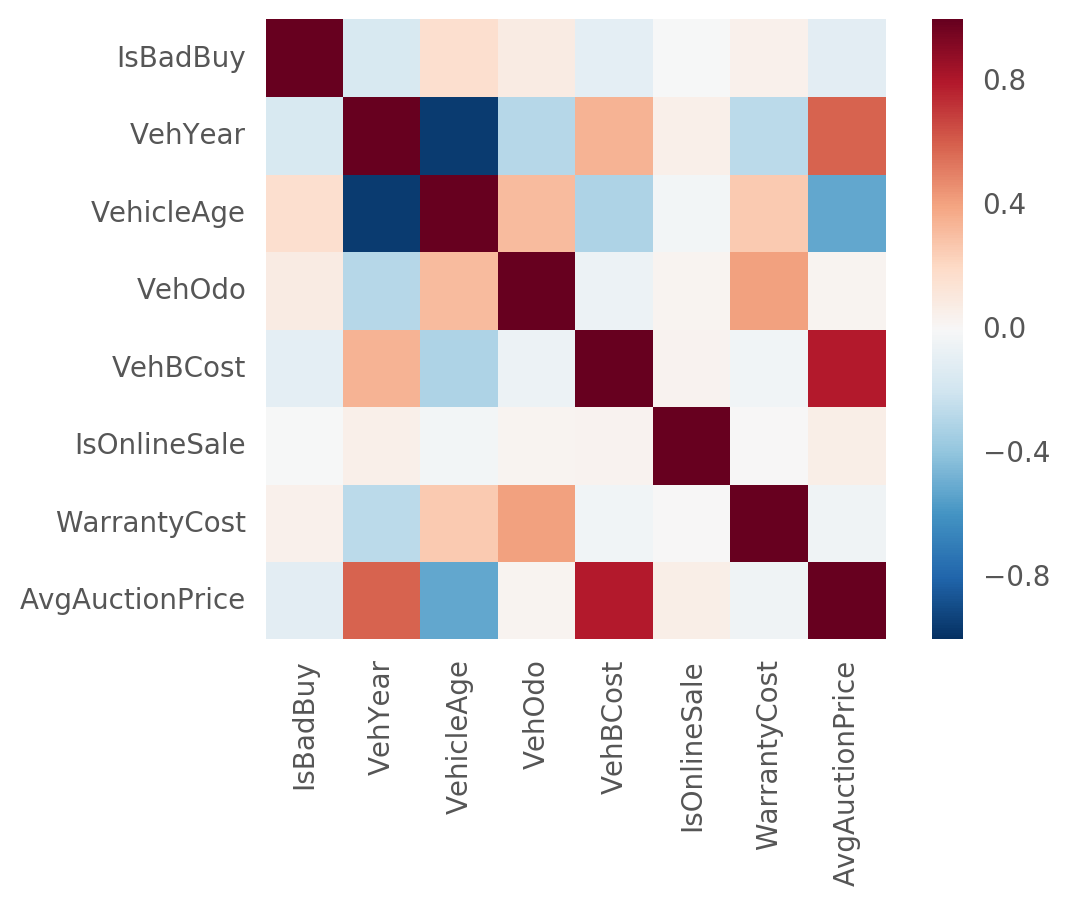

In [85]:
sns.heatmap(X.corr(), square=True)

Can see weak correlations of a good or bad buy with Vehicle age + Odometer readings + warranty

In [86]:
X.columns

Index([u'IsBadBuy', u'Auction', u'VehYear', u'VehicleAge', u'Make', u'Color',
       u'Transmission', u'WheelType', u'VehOdo', u'Nationality', u'Size',
       u'TopThreeAmericanName', u'VNST', u'VehBCost', u'IsOnlineSale',
       u'WarrantyCost', u'AvgAuctionPrice'],
      dtype='object')

In [91]:
cat_cols=["Auction", "Make", "Color", "Transmission", "WheelType" ,"Nationality", "Size", "TopThreeAmericanName",\
         "VNST", "IsOnlineSale"]

### Modeling and preprocessing(feature transformation) for ML

In [111]:
from sklearn.preprocessing import scale, robust_scale, minmax_scale, StandardScaler

In [92]:
dummy=pd.get_dummies(X, columns=cat_cols)
positive_label = dummy[dummy.IsBadBuy == 0]
negative_label = dummy[dummy.IsBadBuy == 1]

In [106]:
# get all index for balancing out our dataset
idx = dummy[dummy["IsBadBuy"]==0].index
x = np.random.choice(idx, 8900, replace=False)
sample_from_positive = dummy.loc[x]
# downsample to create a balanced target class for learning
train_x = pd.concat([sample_from_positive, negative_label], ignore_index=True)

In [107]:
train_x.IsBadBuy.value_counts()

1    8943
0    8900
Name: IsBadBuy, dtype: int64

--> Now we have a balanced target label ready for ML

In [109]:
from sklearn.cross_validation import train_test_split
# let's do a 75, 25 split between training and testing 
def split_train_test(df):
    tmp = df.drop("IsBadBuy", axis = 1)
    train_x, test_x, train_y, test_y = train_test_split(tmp, df["IsBadBuy"], test_size=0.3)
    train_x = pd.DataFrame(train_x, columns=df.columns[1:])
    test_x = pd.DataFrame(test_x, columns=df.columns[1:])
    train_y = pd.DataFrame(train_y, columns=['IsBadBuy'])
    test_y = pd.DataFrame(test_y, columns=['IsBadBuy'])
    
    scale(train_x)
    scale(test_x)
    return train_x, test_x, train_y, test_y

In [110]:
x_train, x_test, y_train, y_test = split_train_test(train_x)

Scaling and standardizing values

In [112]:
scalar = StandardScaler()
scalar.fit(x_train)
x_train_deviation = scalar.transform(x_train)
x_test_deviation = scalar.transform(x_test)

In [156]:
x_train_deviation.shape

(12490, 122)

In [117]:
y_train_np = np.array(y_train)
y_train_reshaped = y_train_np.reshape(-1,) # make it "scikit-learn" friendly format
y_test_np = np.array(y_test)
y_test_reshaped = y_test_np.reshape(-1,) # make it "scikit-learn" friendly format

Our evaluation criteria metric we will look into is true positive rates/recall or the confusion matrix since we were able to balanace out the dataset

In [119]:
from sklearn import *
from sklearn.metrics import *
from sklearn.linear_model import *

#### Logit model

In [120]:
logistic_reg = LogisticRegression(C = 10, max_iter=200)
logistic_reg.fit(x_train_deviation, y_train_reshaped)
y_pred=logistic_reg.predict(x_test_deviation)
accuracy_score(y_test_reshaped, y_pred)

0.68671772837661127

Accuracy score of 68.7 % first try using a basic logistic regression model. Let's cross validate

In [ ]:
predictions = cross_validation.cross_val_predict(logistic_reg, x_train_deviation, y_train_reshaped, cv=50)
scores = cross_validation.cross_val_score(logistic_reg, x_train_deviation, y_train_reshaped, cv=50)
metrics.classification_report(y_train_reshaped, predictions)

In [122]:
print(metrics.classification_report(y_train_reshaped, predictions))

             precision    recall  f1-score   support

          0       0.65      0.75      0.70      6221
          1       0.71      0.60      0.65      6269

avg / total       0.68      0.68      0.67     12490



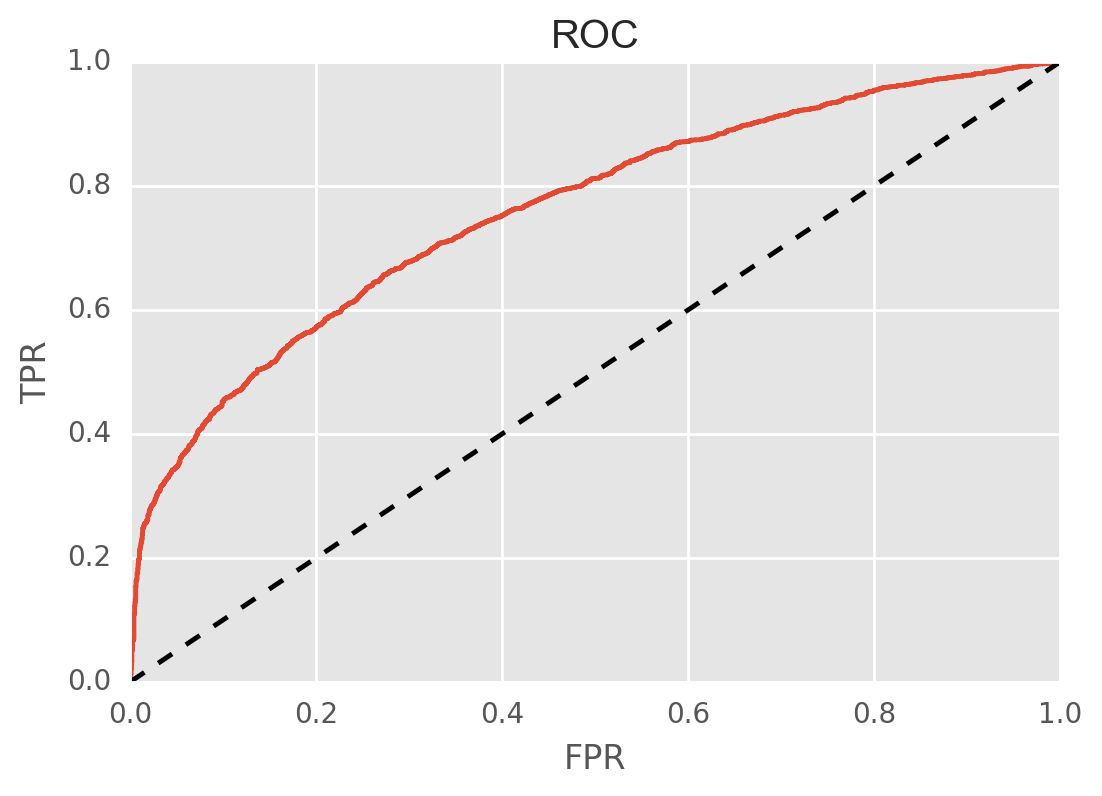

In [126]:
false_pos, true_pos, threshold = roc_curve(y_test_reshaped, logistic_reg.decision_function(x_test_deviation))
plt.plot(false_pos, true_pos)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC")
plt.show()

#### SVM model

In [128]:
from sklearn.svm import SVC
svc = SVC(kernel="rbf").fit(x_train_deviation, y_train_reshaped)
y_predict_svc = svc.predict(x_test_deviation)
print(metrics.classification_report(y_test_reshaped, y_predict_svc))

             precision    recall  f1-score   support

          0       0.65      0.75      0.70      2679
          1       0.70      0.59      0.64      2674

avg / total       0.67      0.67      0.67      5353



### Feature selection ( quick test)

--> Top 15 features based on a random forest regressor

In [168]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
ranks = {}
def rank_to_dict(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x, 2), ranks)
    return dict(zip(names, ranks ))

rf = RandomForestRegressor()
rf.fit(X,Y)
ranks["RF"] = rank_to_dict(rf.feature_importances_, names)

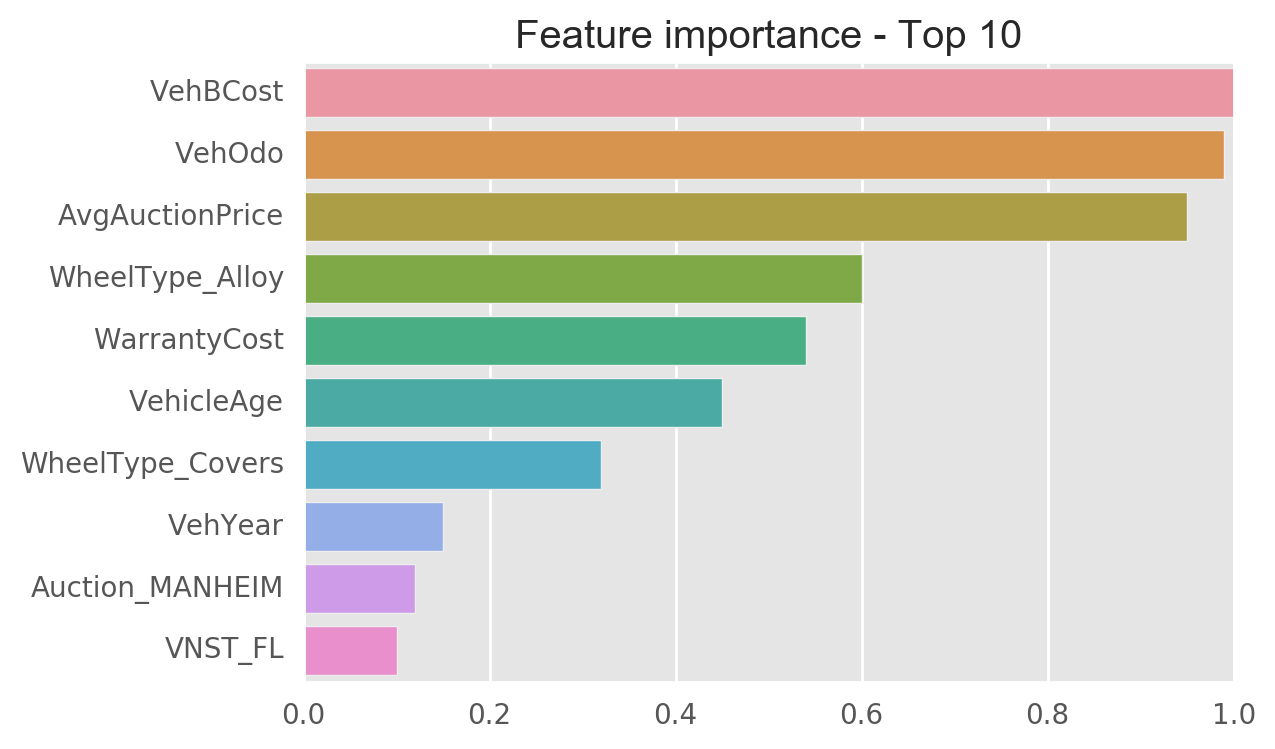

In [190]:
xx=zip(*sorted_x[:10])[0]
yy=zip(*sorted_x[:10])[1]
ax=plt.axes()
sns.barplot(y=xx, x=yy, ax=ax)
ax.set_title('Feature importance - Top 10')

We see here the Acquisition cost paid for the vehicle at time of purchase and the Odometer and Avg Auction price seems to be the top important aka high entropy features to tell if the car bought is a good or a bad buy 

In [192]:
!open .

---

### Further & next steps - improving model performance

- LSH (clustering similar items)
- Bayesian learning with priors
- Extensive feature selection + recursive feature elimination + CV
- Assumptions made(including data fits in memory, some features removed without much validations
- PCA + backward/forward feature selection
- better variable naming?

Time taken ~ 2.15 hrs